<a href="https://colab.research.google.com/github/DavidPolot/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##David Polotsky
2nd Project, cellular automation of the spread of COVID

can we use cellular automation to visualize and generalize the spread of a virus like COVID

In [ ]:

%matplotlib inline


import math
import time
from dataclasses import dataclass

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.signal import correlate2d

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

##starting parameters
these parameters take the grid size, and the initially infected, I picked out 5 to begin with to start infecting. those 5 will spread to other neighbours and then the graph will soon then be filled up

In [ ]:
#from previous lab exercises
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY = 0.02  # Probability of death
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

def initialize_grid():
    return np.zeros((GRID_SIZE, GRID_SIZE))

def randomly_infect(grid):
    """infect a random cell in the grid"""

    xs = np.random.choice(range(GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    ys = np.random.choice(range(GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    grid[xs,ys] = INFECTED

    return grid

g = initialize_grid()
randomly_infect(g)
assert np.sum(g) == INITIAL_INFECTED


##defining rules and the kernel
the chances of infecting another person if they are susceptible and will measure then if this infected person will have a chance to die or recover. the mortality rate alters the death chance and obviously the recovery rate will alter recovery rate


In [ ]:

#chatgpt
# Define neighborhood kernel
Neighborhood = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

def update_grid(grid):
    # Define the rules of the grid
    grid = g
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if g[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in Neighborhood: #these are the differences of the x and y values
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE and grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                        g[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    g[i, j] = DEAD if np.random.rand() < MORTALITY else RECOVERED
    return g

print(update_grid(g))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##creating the animation
i do not know how to create an animation through one window, there was not enough time for me to figure it out when i wrote the code because I tried for 4 days through with the animation

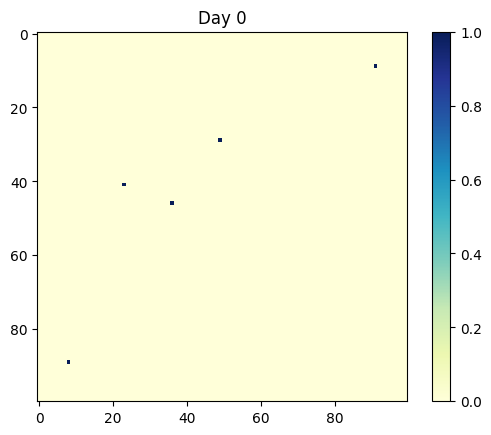

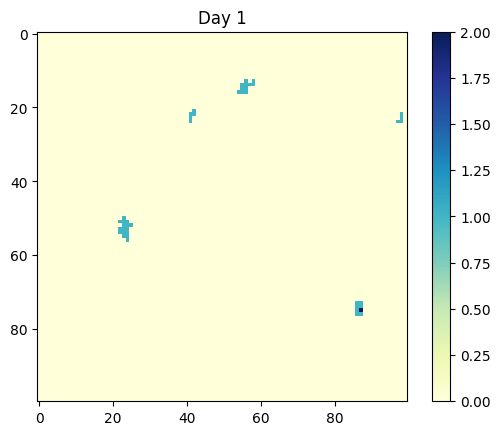

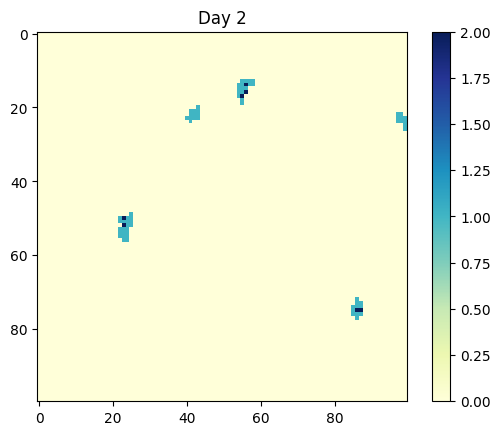

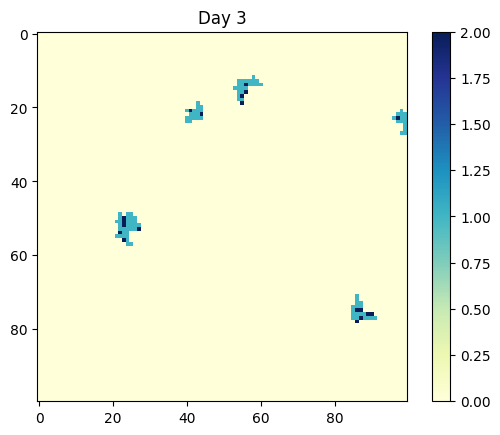

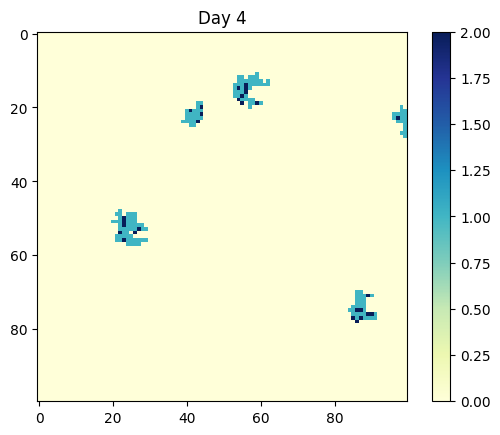

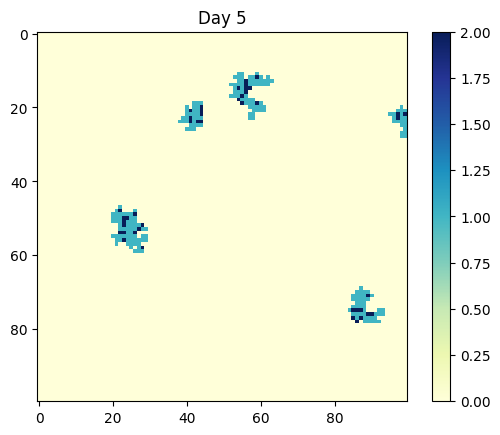

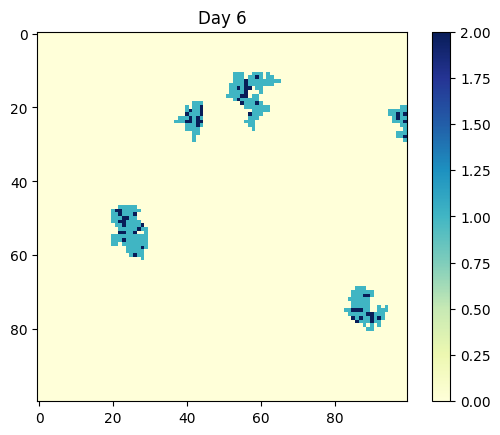

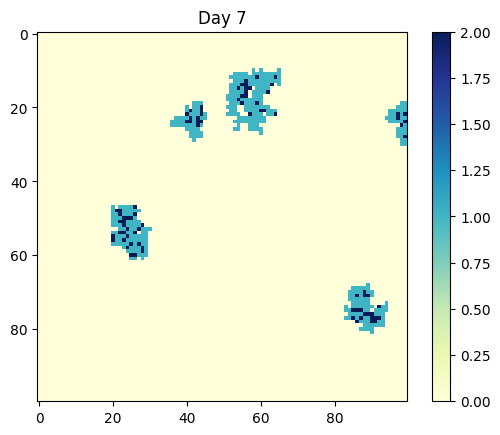

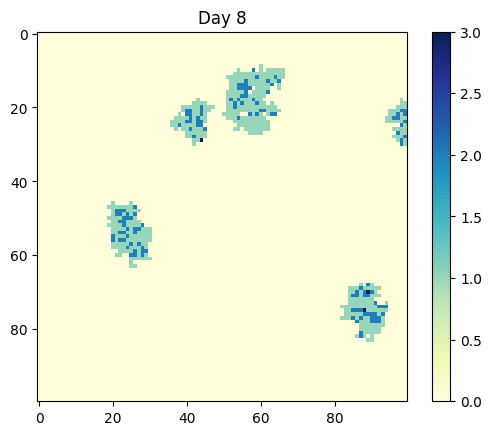

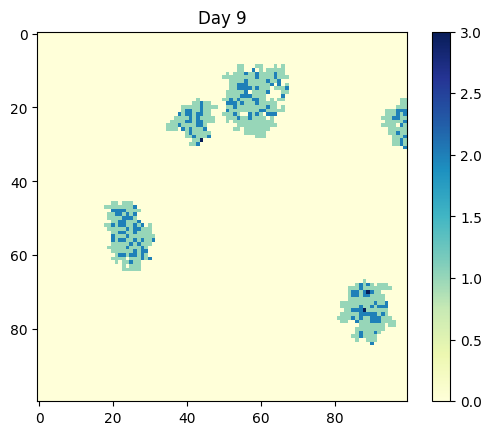

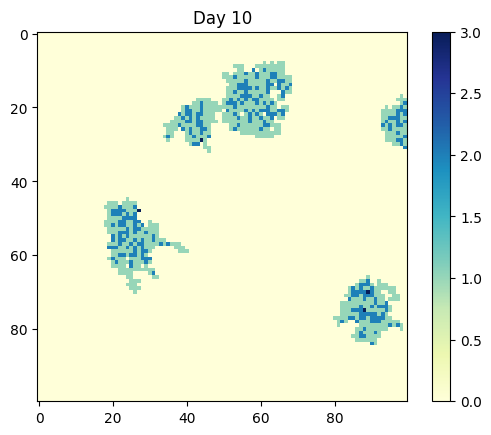

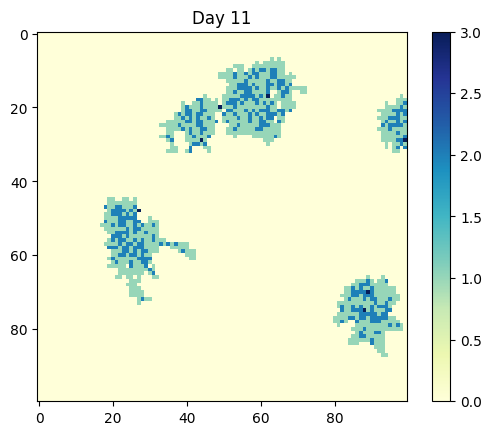

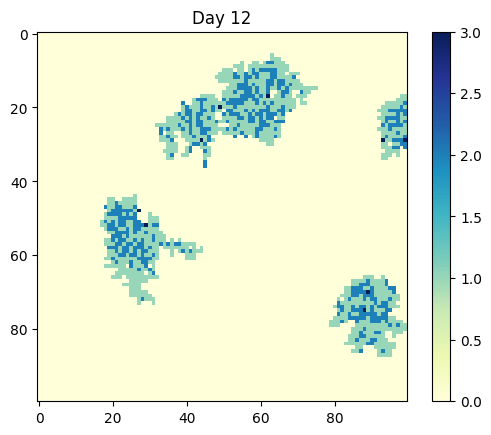

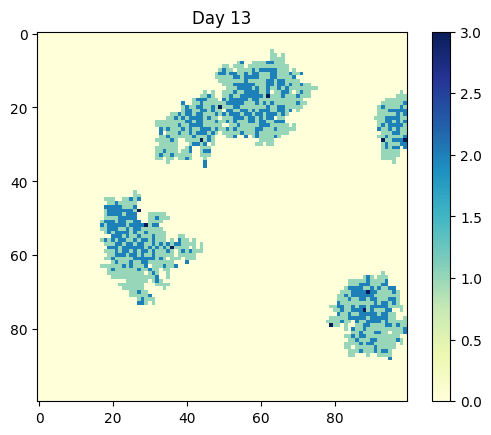

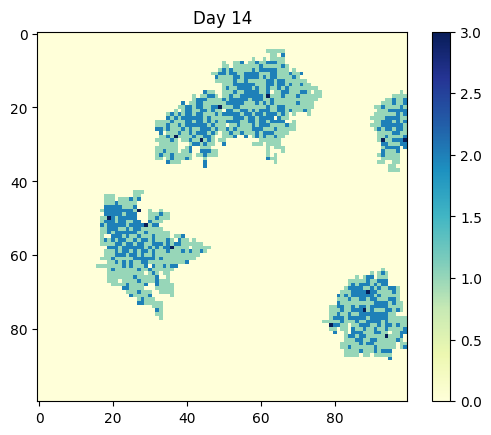

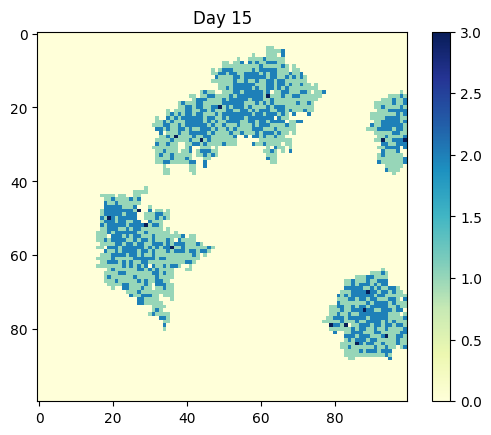

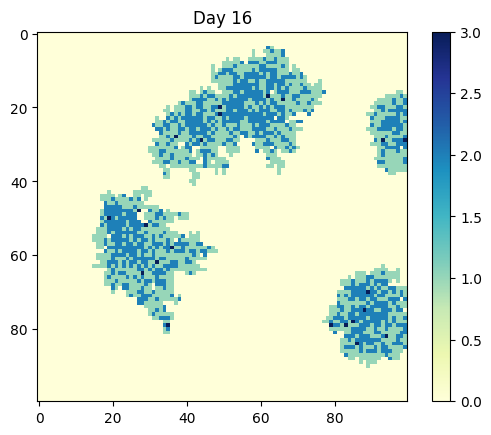

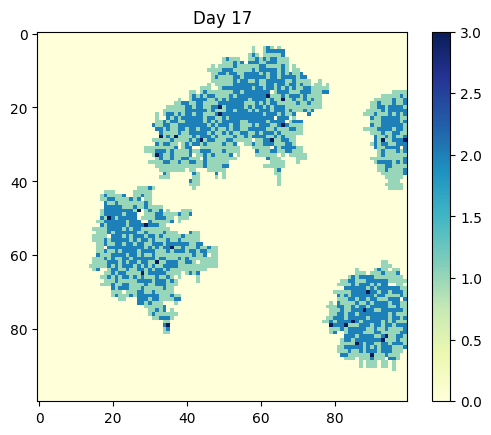

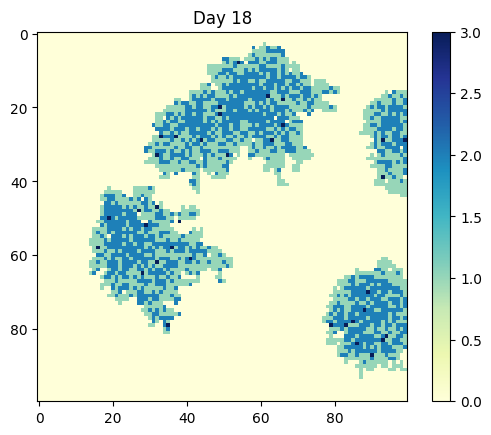

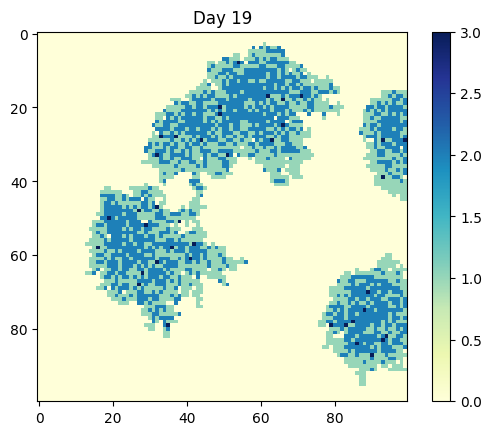

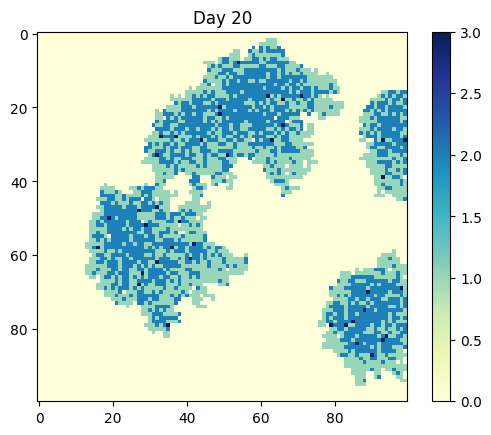

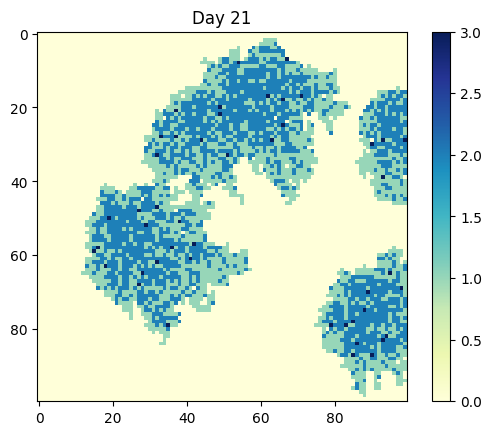

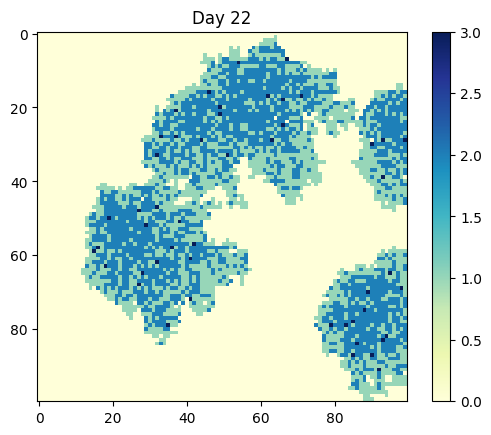

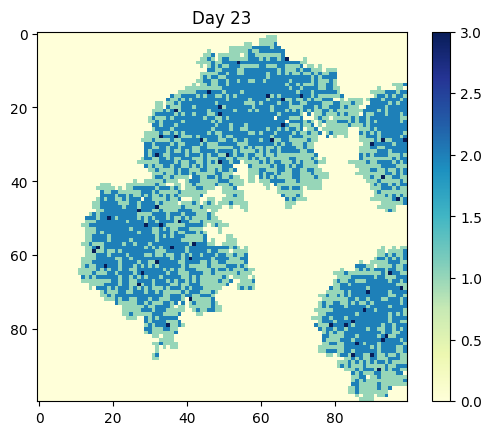

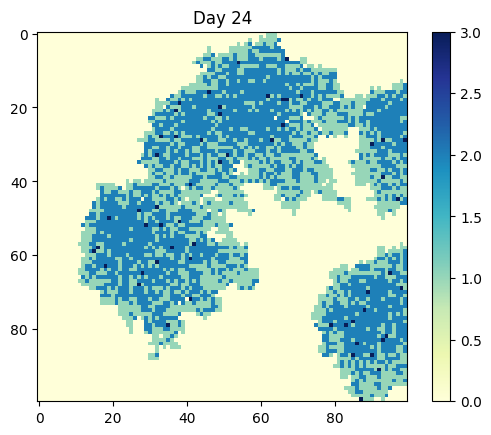

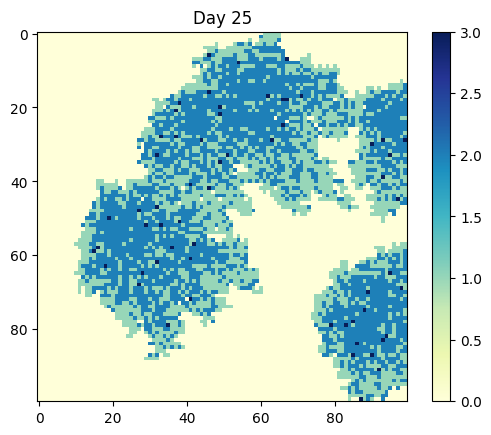

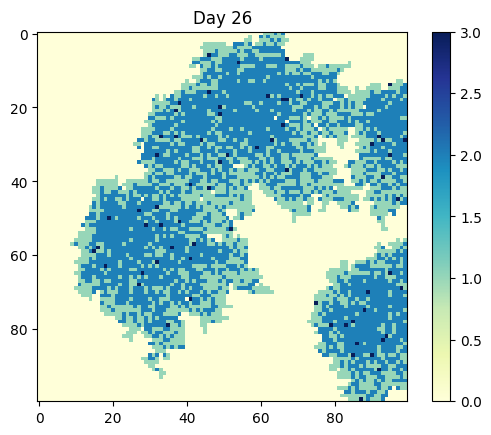

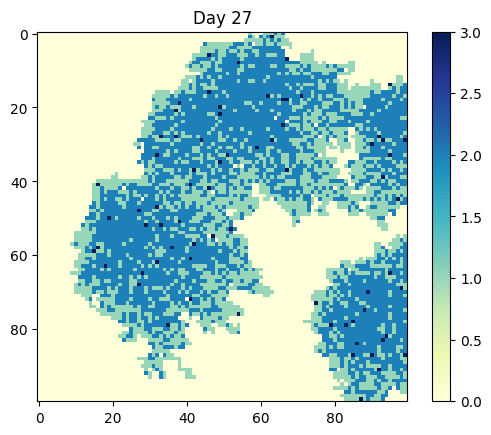

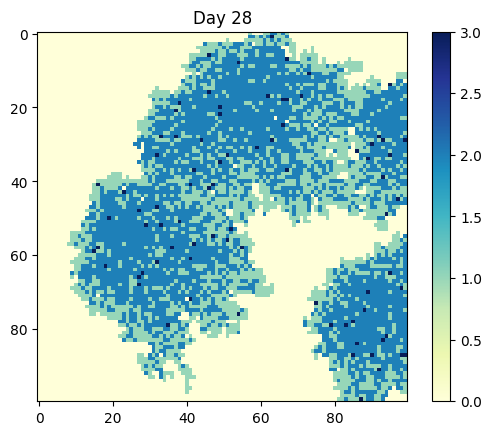

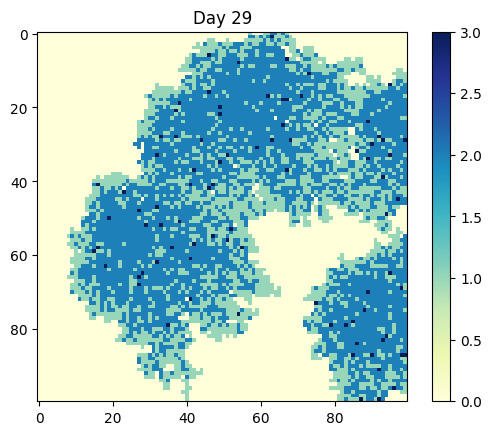

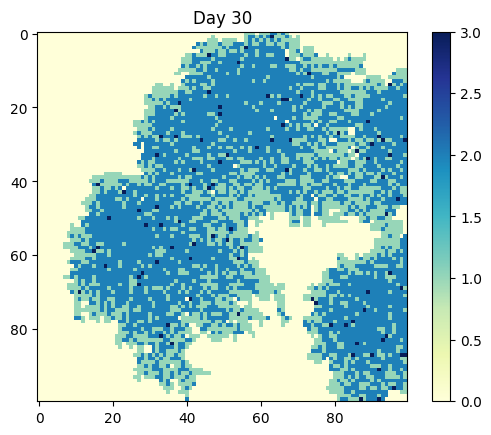

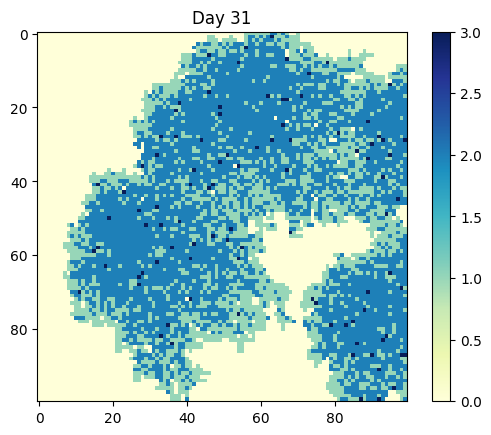

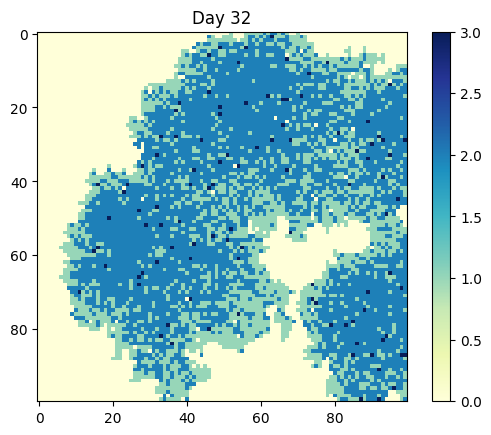

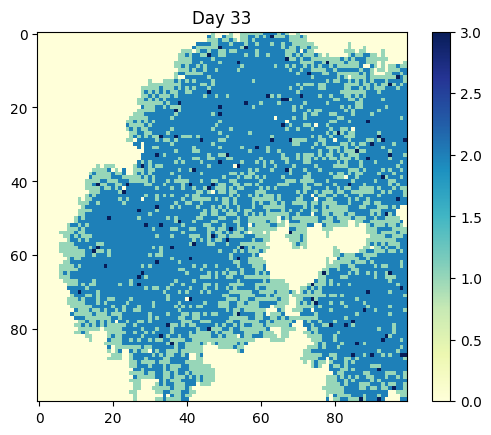

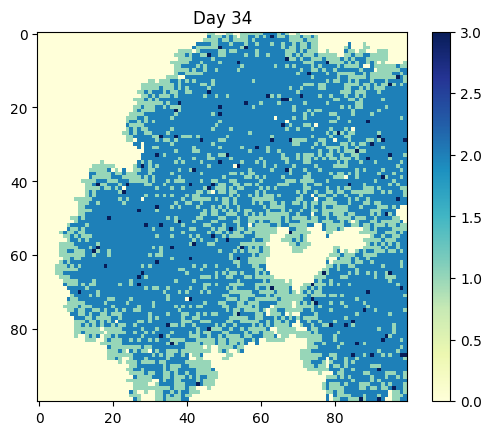

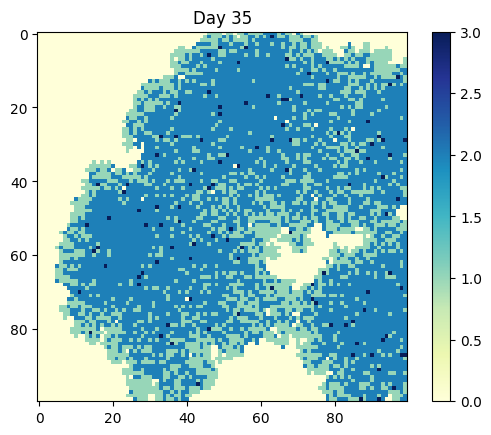

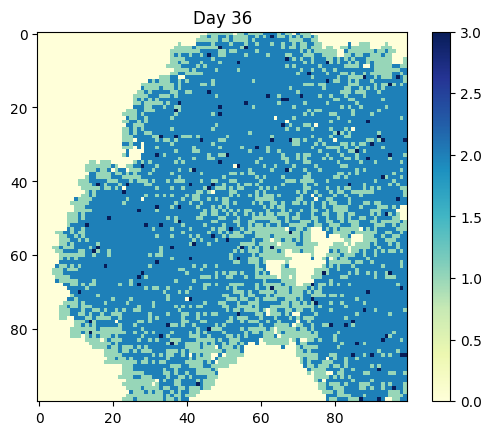

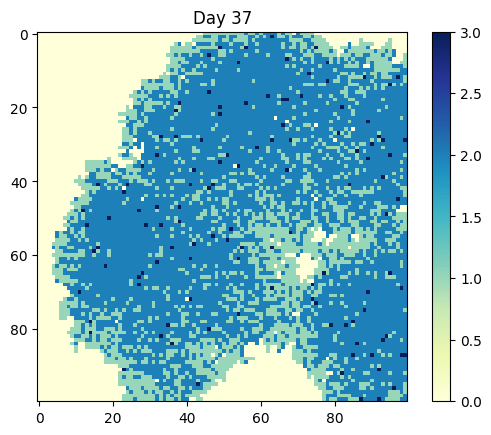

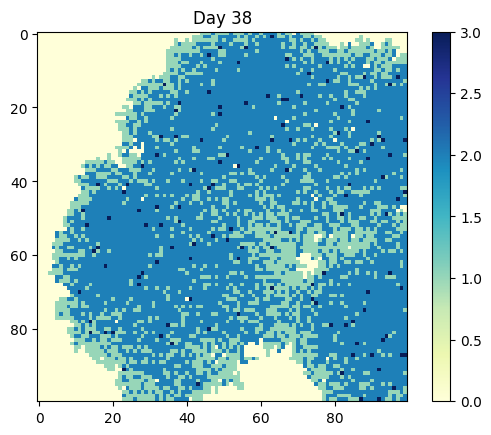

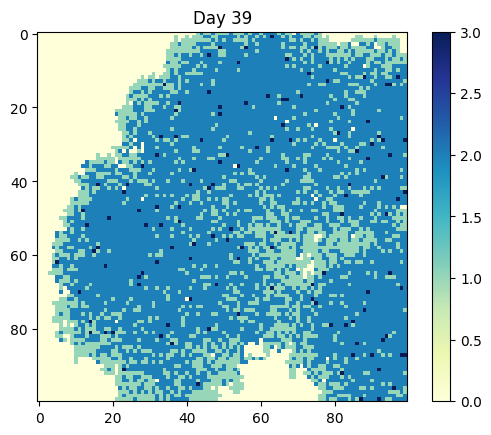

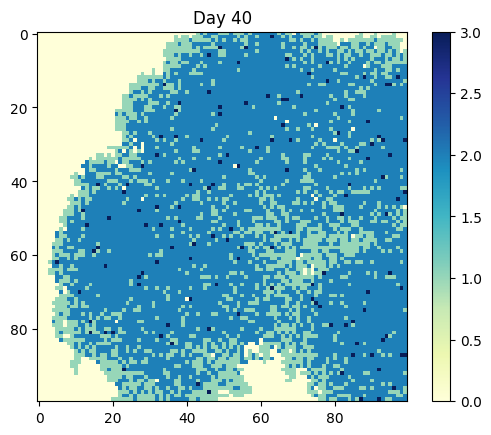

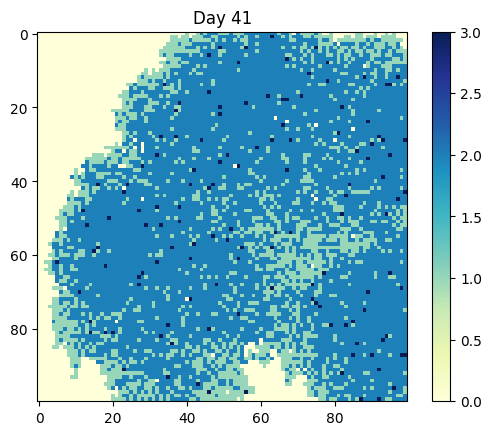

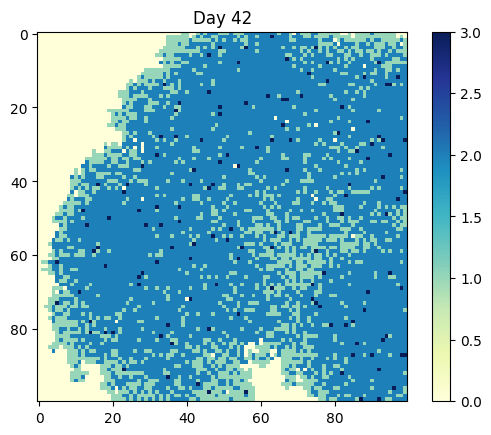

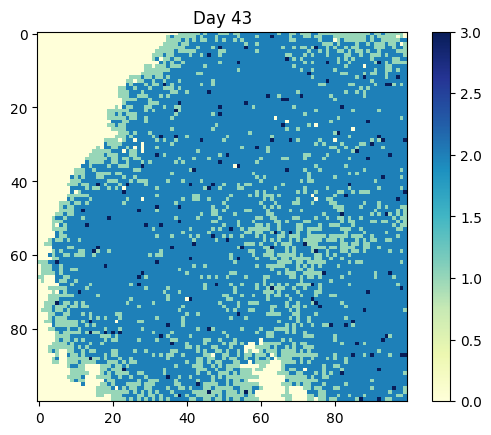

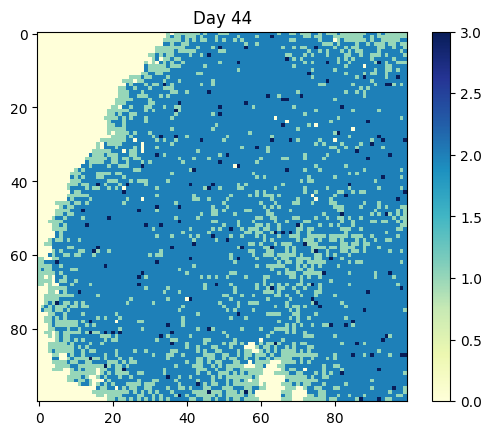

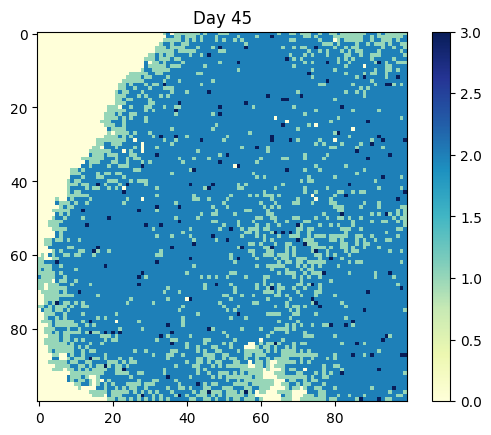

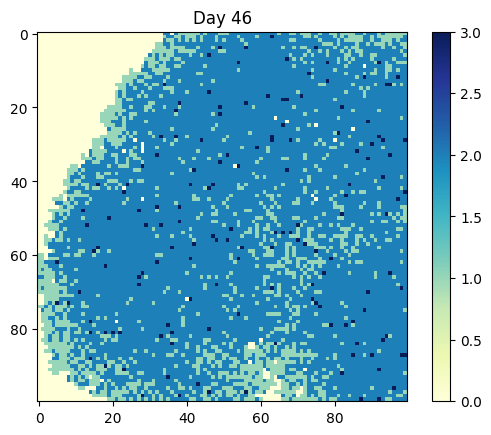

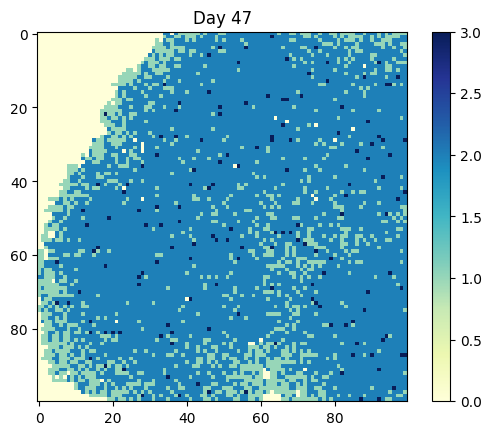

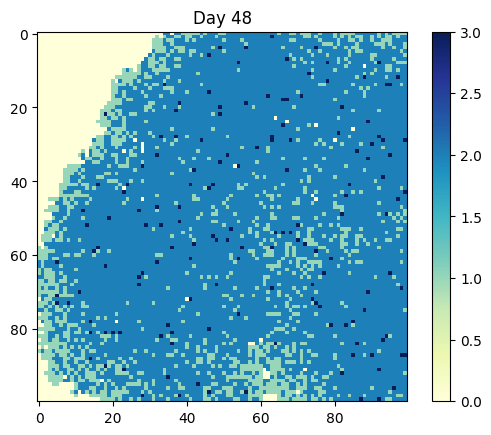

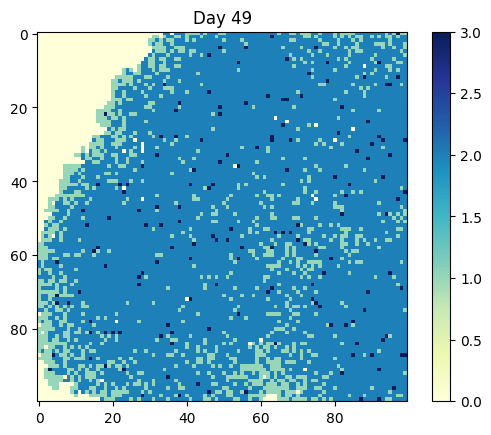

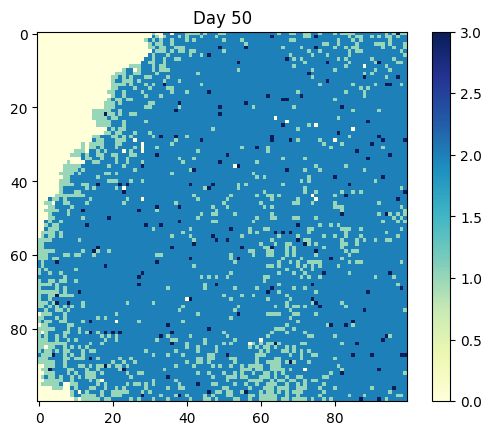

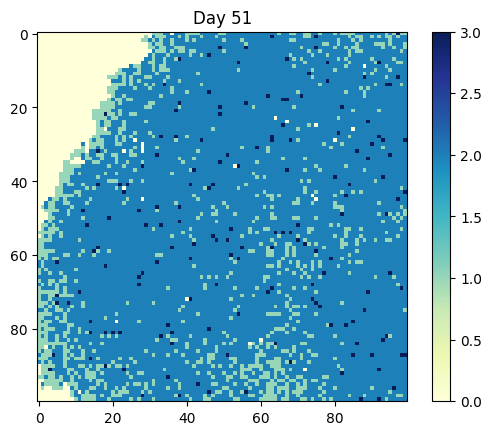

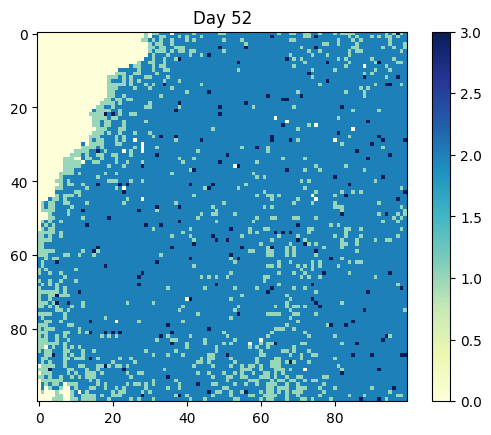

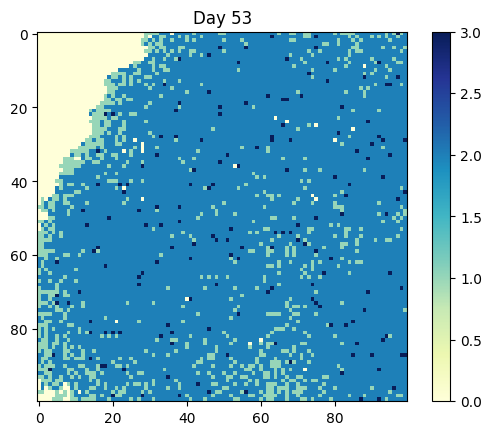

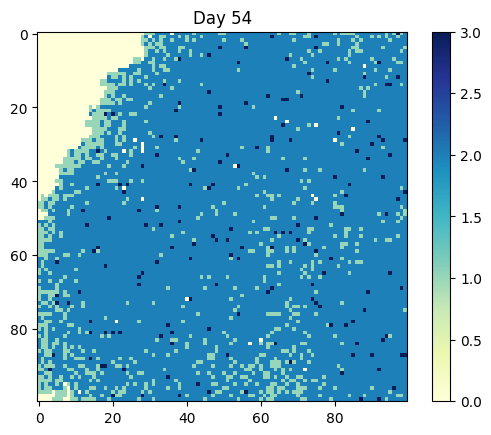

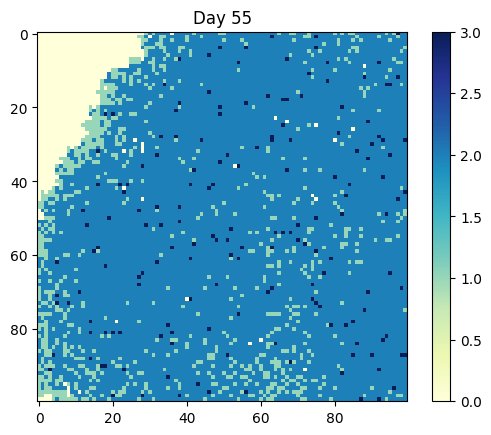

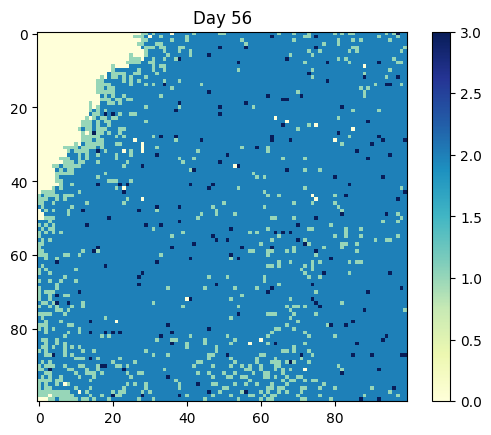

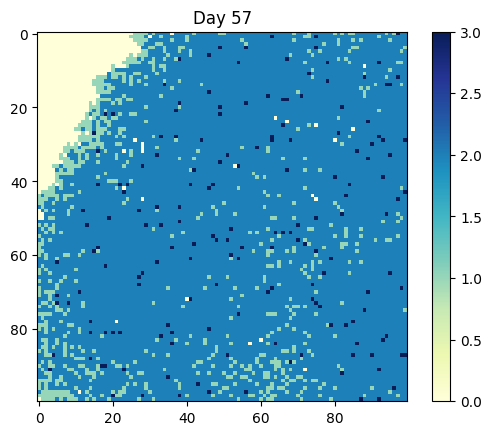

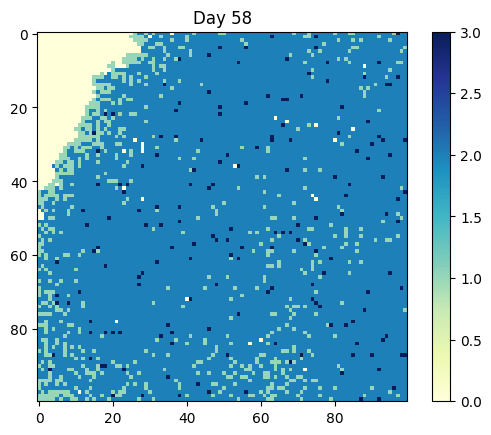

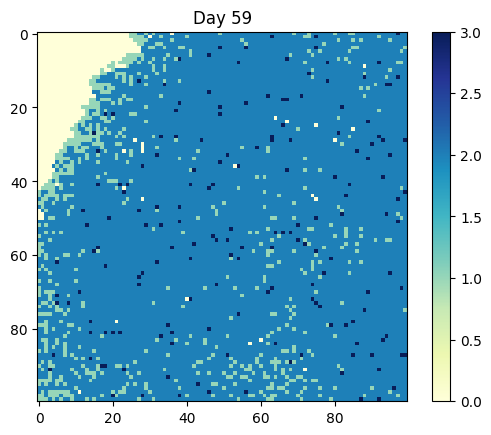

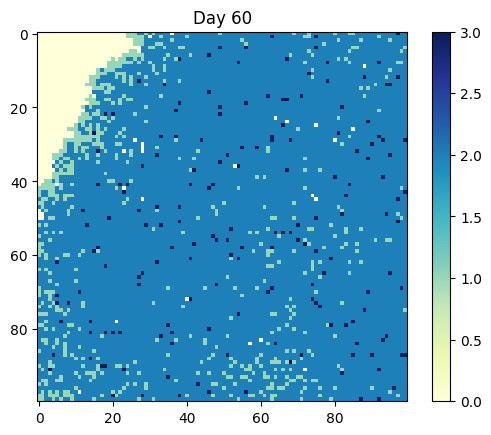

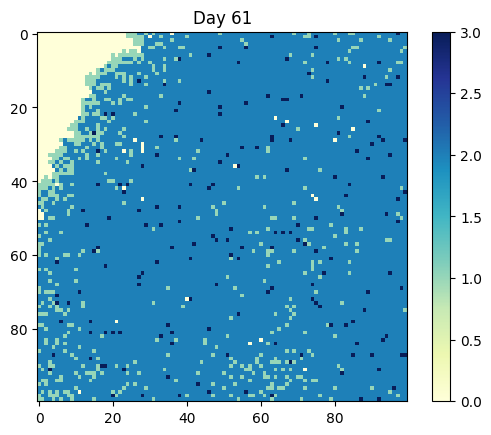

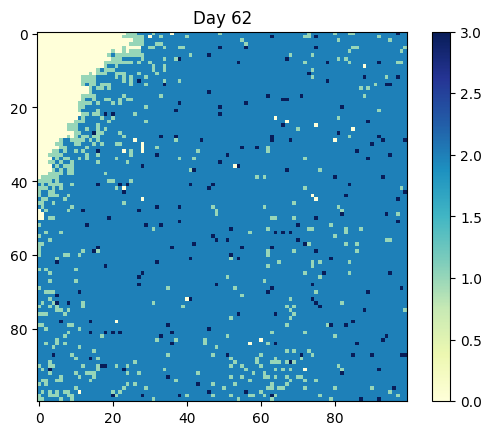

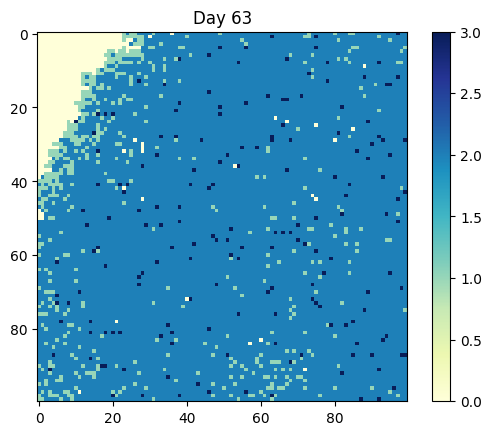

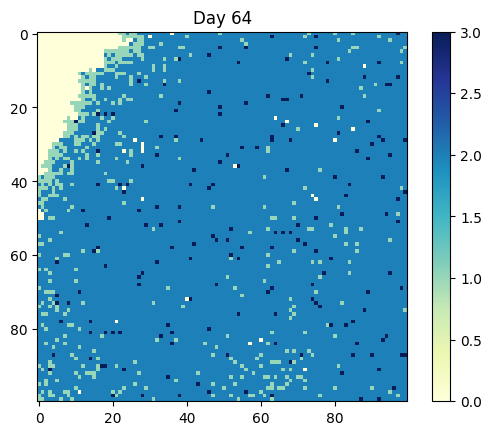

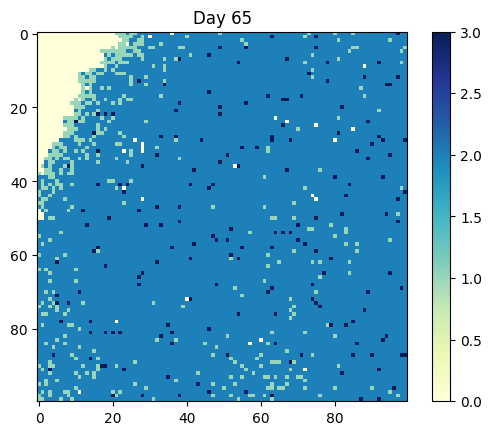

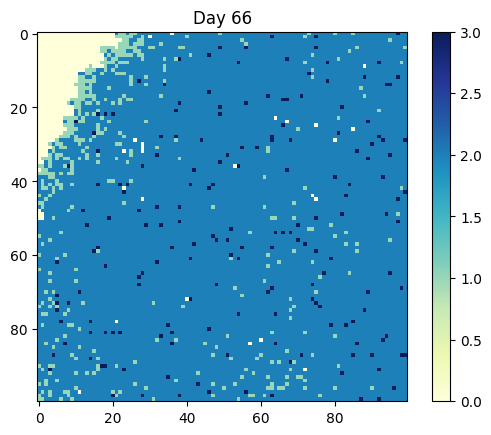

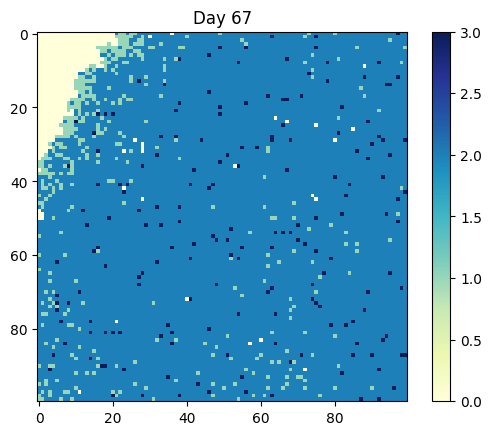

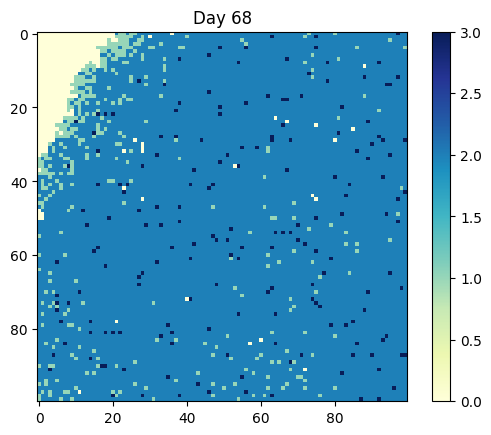

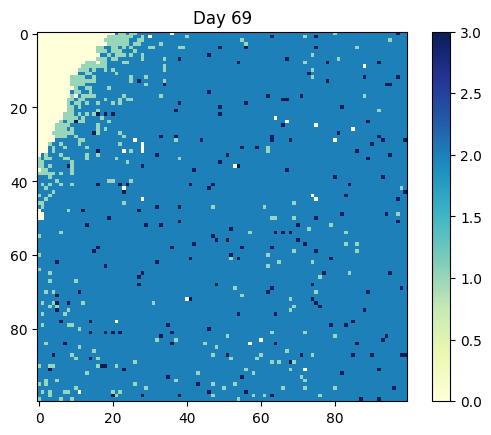

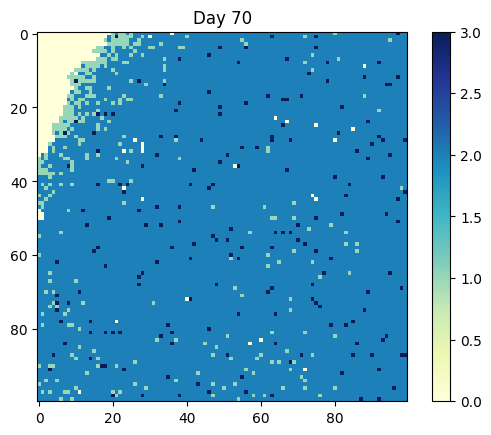

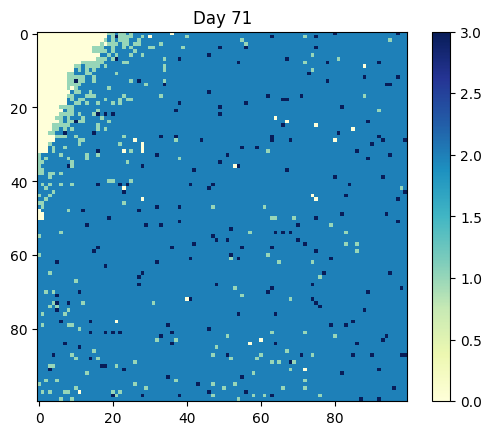

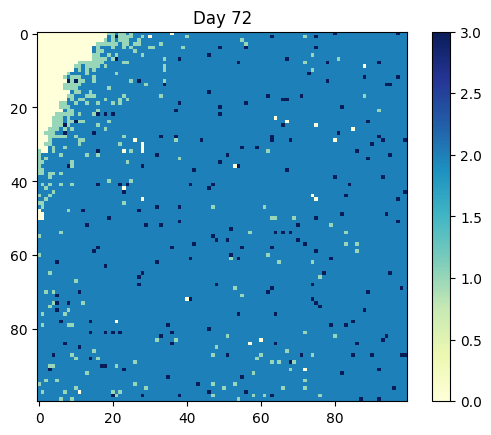

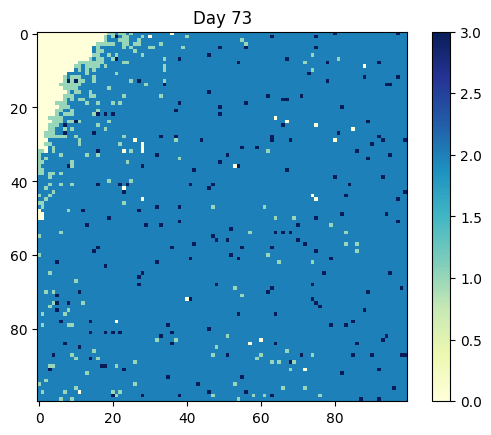

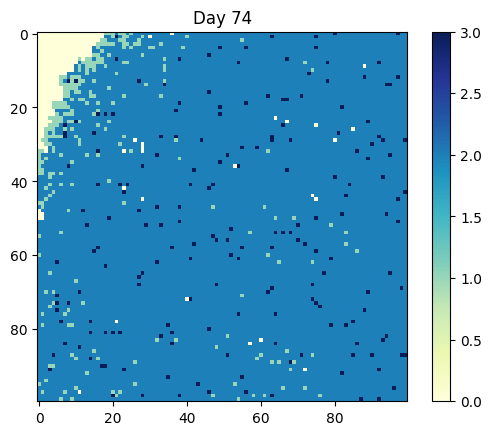

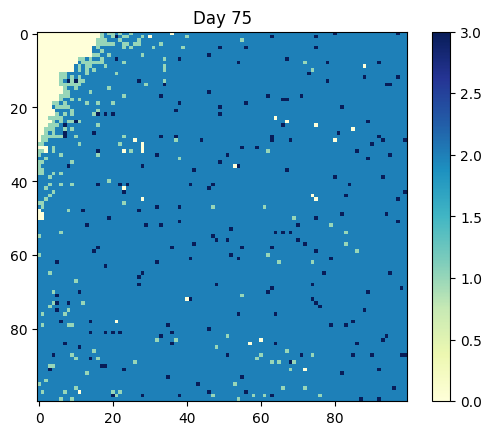

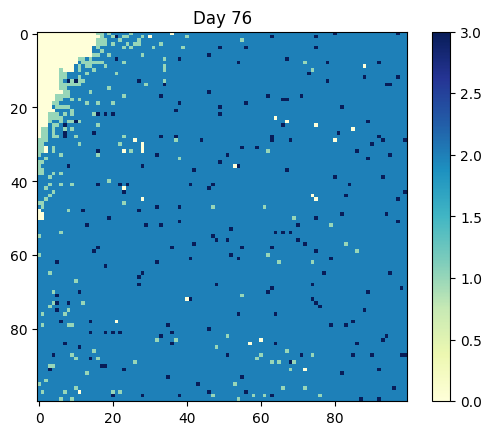

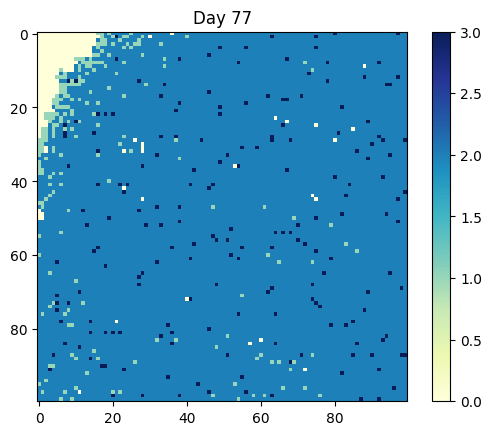

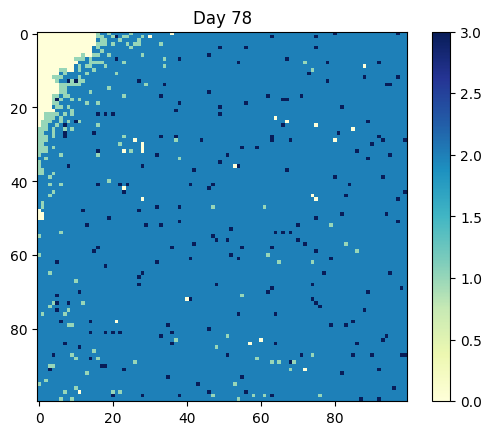

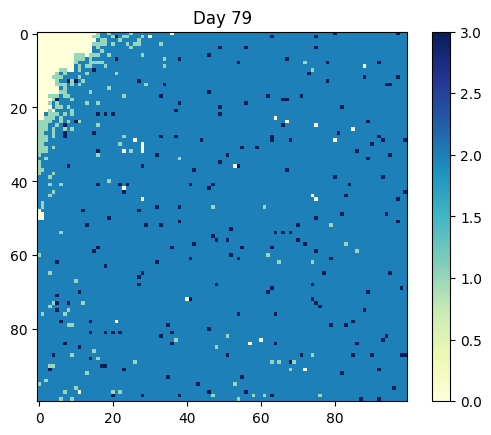

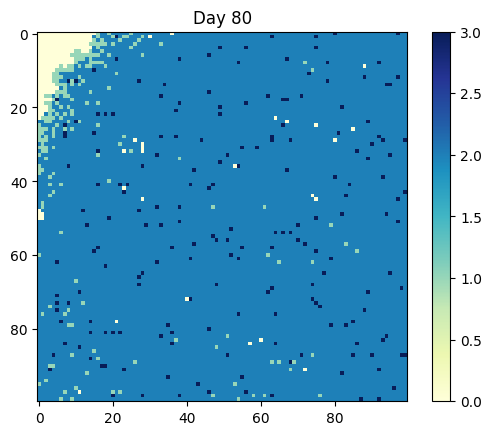

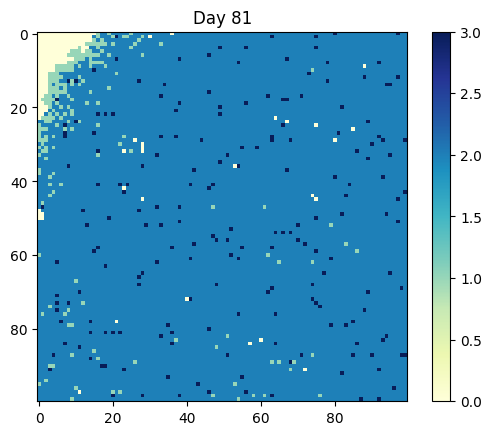

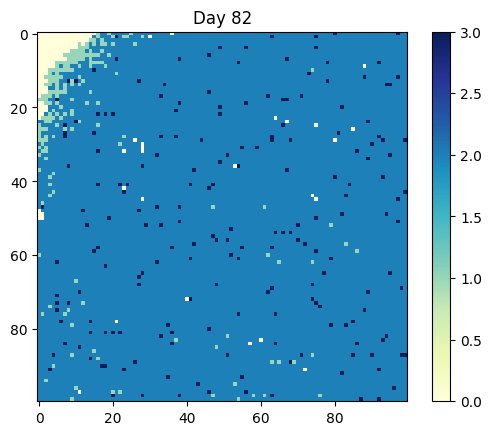

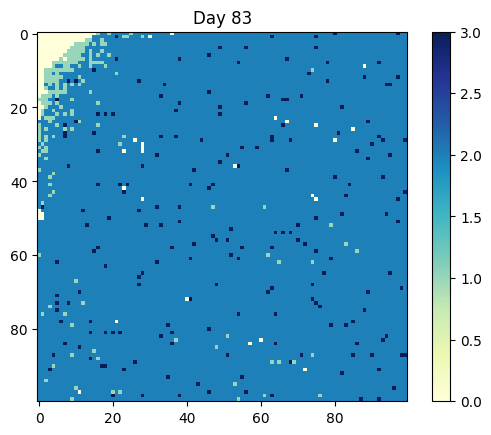

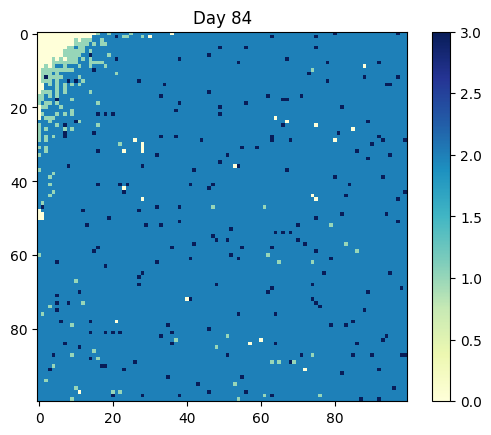

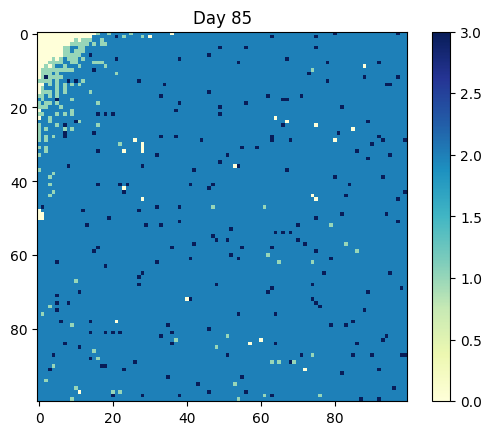

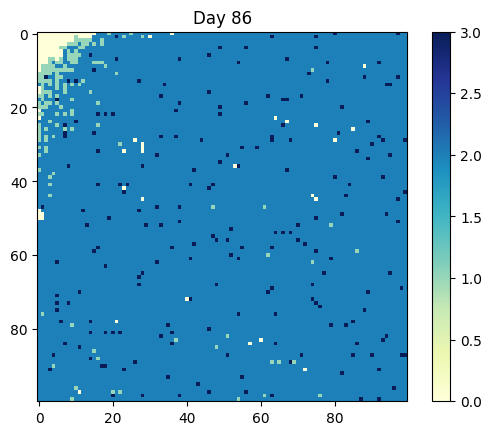

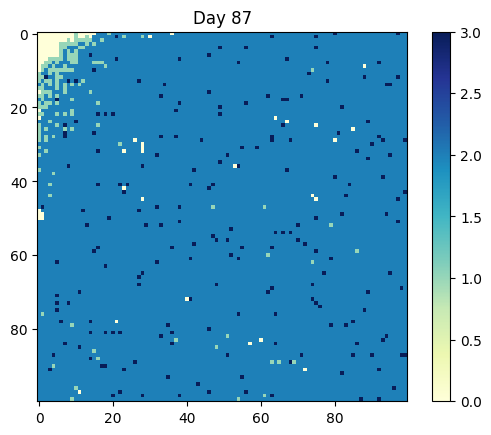

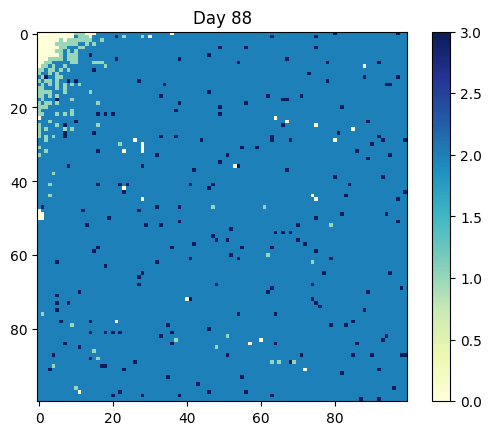

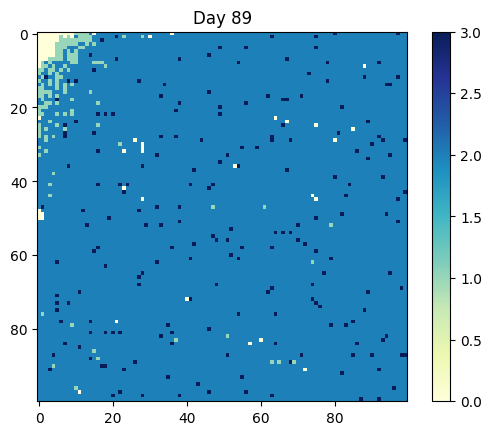

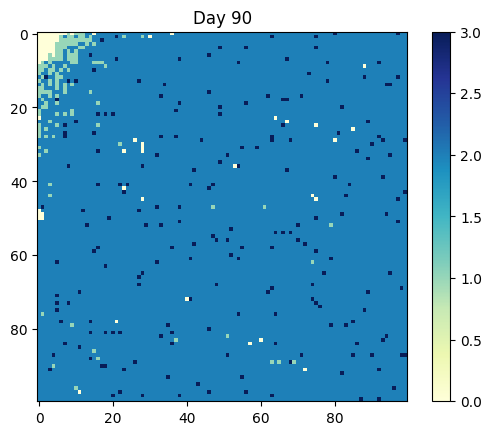

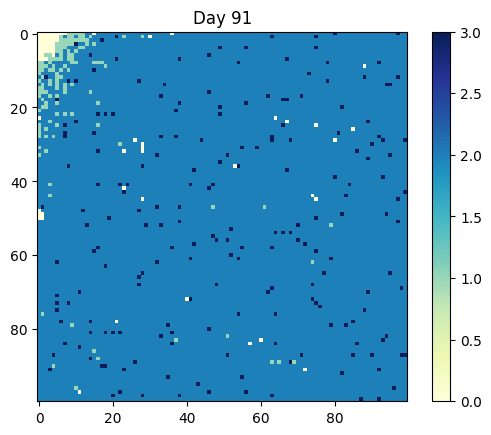

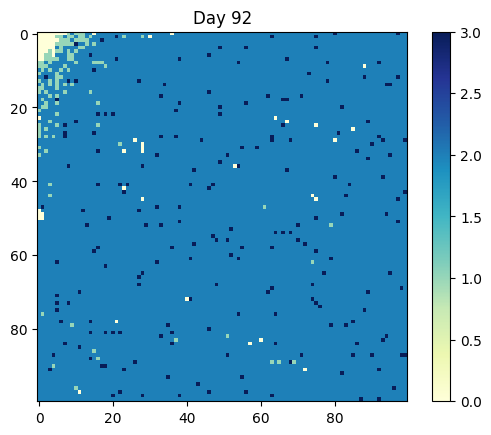

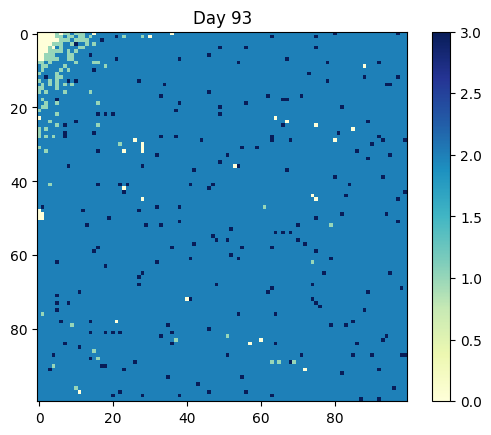

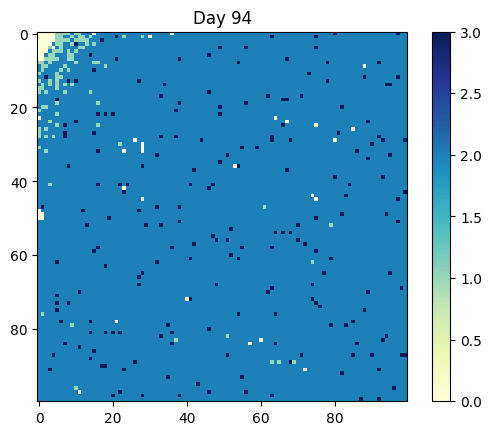

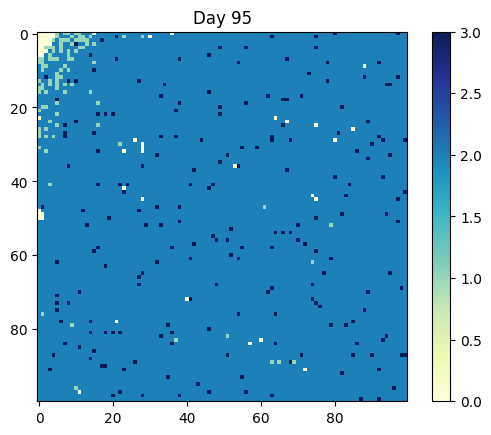

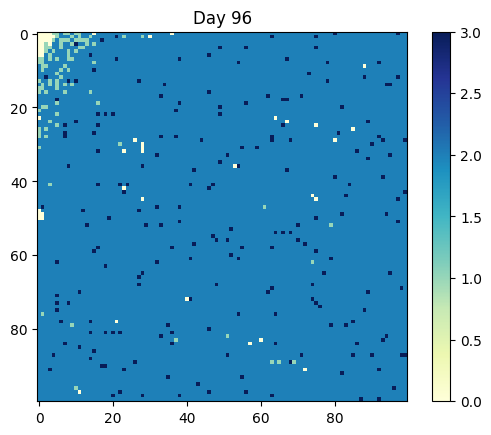

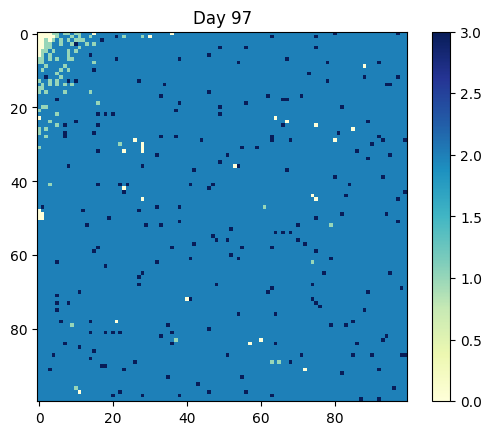

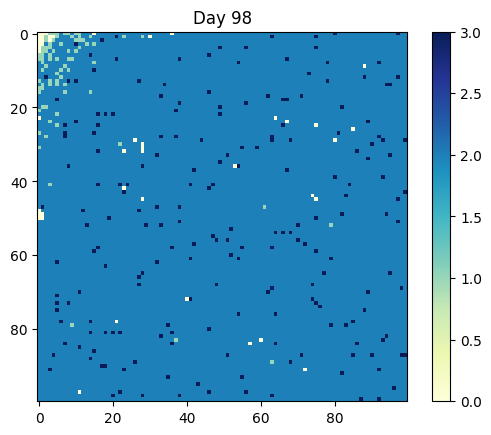

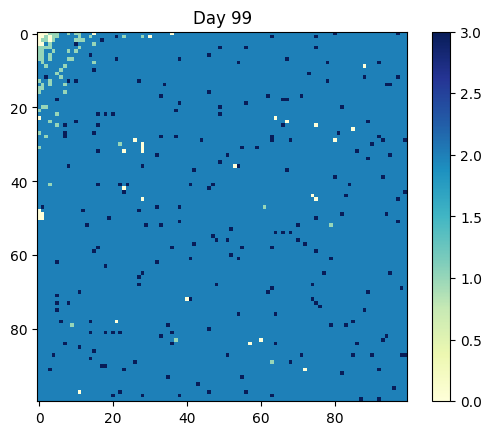

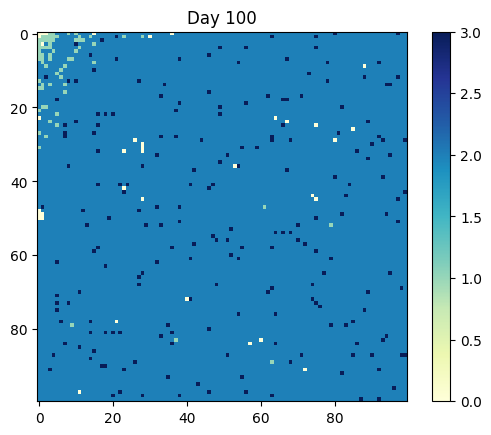

In [ ]:
def display_grid(grid, day):
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title(f'Day {day}')
    plt.show()

def start_anim():
    grid = initialize_grid()
    grid = randomly_infect(grid)
    display_grid(grid, 0)

    for day in range(1, 101):
        plt.grid(False)
        grid = update_grid(grid)

        display_grid(grid, day)

start_anim()

##Timing tests
to test how long the algorithm would take to stabilize

In [ ]:
import time
import numpy as np



def check_stabilization(infected_history):

    return all(infected_history[-10:])

def run_simulation():
    start_time = time.time()

    # Initialize grid
    grid = initialize_grid()

    # Infect initial cells
    randomly_infect(grid)

    # Track infected history
    infected_history = []


    #create timing tests for the functions - chatgpt
    day = 0
    while True:
        # Update grid
        grid = update_grid(grid)

        # Calculate metrics
        num_infected = np.sum(grid == INFECTED)
        infected_history.append(num_infected)

        # Check for stabilization
        #there was a specific error with the code i wrote, chatgpt added the break function, which it enables to get out of a loop when it reaches a condition
        if len(infected_history) >= 10 and check_stabilization(infected_history):
            break

        day += 1

    end_time = time.time()
    execution_time = end_time - start_time

    return day, execution_time


def timing():
    # Run simulation
    days_to_stabilize, execution_time = run_simulation()
    print(f"Simulation stabilized after {days_to_stabilize} days, Execution Time: {execution_time:.4f} seconds")

g = timing()
print(g)

Simulation stabilized after 9 days, Execution Time: 0.0544 seconds
None
